# DATA VISUALIZATION

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
sample_data = pd.read_csv(
    "https://raw.githubusercontent.com/davidbrandon16/binusMachineLearning/master/sample.csv",
    sep=";",
)

In [16]:
data_1 = sample_data.drop_duplicates().dropna().reset_index(
    drop=True
).rename(
    columns={
        "Industry_aggregation_NZSIOC": "level",
        "Industry_code_NZSIOC": "code",
        "Industry_name_NZSIOC": "name",
    }
).drop(columns="Year")
data_1.loc[(data_1.Units == "Dollars (millions)"), "Value"] = data_1.Value * 1000
data_1 = data_1[["level", "name", "Value"]]

In [17]:
data_2 = sample_data.drop_duplicates().fillna(
    0,
).reset_index(
    drop=True,
).rename(
    columns={
        "Industry_aggregation_NZSIOC": "level",
        "Industry_code_NZSIOC": "code",
        "Industry_name_NZSIOC": "name",
    }
).drop(columns="Year")

In [18]:
data_1.head()

,level,name,Value
0,Level 3,Horticulture and Fruit Growing,4432000.0
1,Level 3,Horticulture and Fruit Growing,4119000.0
2,Level 3,Horticulture and Fruit Growing,211000.0
3,Level 3,Horticulture and Fruit Growing,3579000.0
4,Level 3,Horticulture and Fruit Growing,180000.0


In [21]:
data_level_3 = data_1[data_1.level=="Level 3"]
data_level_4 = data_1[data_1.level=="Level 4"]

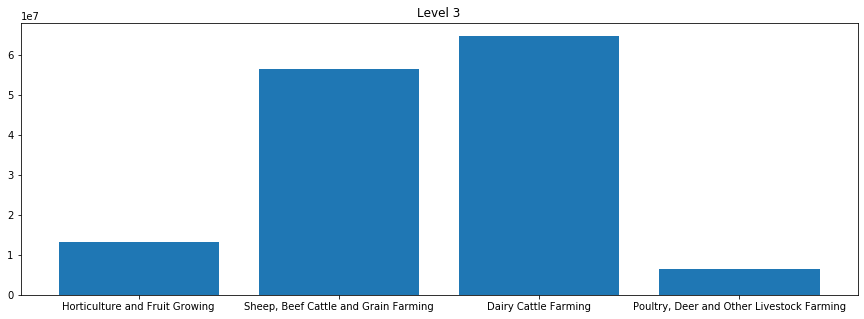

In [59]:
_ = plt.figure(figsize=(15,5))
_ = plt.title("Level 3")
_ = plt.bar(
    data_level_3.name,
    data_level_3.Value,
    width=0.8,
)

In [60]:
data_level_3_grouped = data_level_3.groupby(["name"]).mean()
data_level_4_grouped = data_level_4.groupby(["name"]).mean()

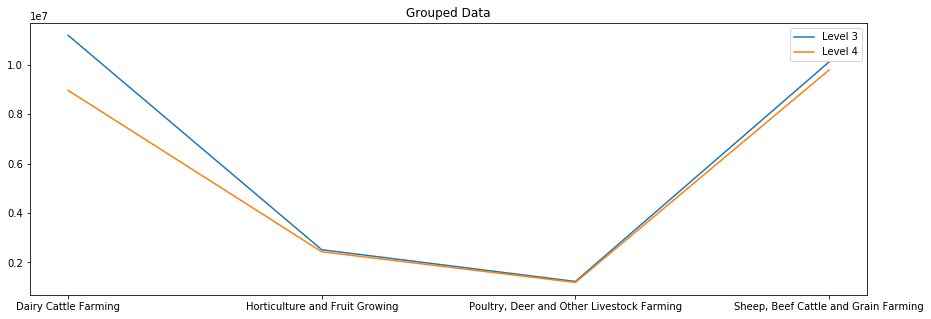

In [61]:
_ = plt.figure(figsize=(15,5))
_ = plt.title("Grouped Data")
_ = plt.plot(data_level_3_grouped, label="Level 3")
_ = plt.plot(data_level_4_grouped, label="Level 4")
_ = plt.legend()